In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#df = pd.read_csv("train_df_covid.csv", sep=";")
train_df = pd.read_csv("train_df.csv")

In [ ]:
train_df

,tweetOG,tweetBR,class,class_knn
0,Facebook posts shared in at least three countr...,Postagens do Facebook compartilhadas em pelo m...,0,1
1,Wisconsin is Òclearly seeing a decline in COVI...,Wisconsin está vendo um declínio no Covid Infe...,0,1
2,Facebook posts claim a child who is infected w...,Postagens do Facebook Reivindicam uma criança ...,0,1
3,IndiaÕs Ministry of Home Affairs banning citiz...,Índia Ministério dos Assuntos Internos que pro...,0,1
4,"42 Democratic senators, plus two Independents,...","42 Senadores democráticos, mais dois independe...",0,1
...,...,...,...,...
3519,Another cure for COVID- must watch! https://t....,Outra cura para Covid- deve assistir! https://...,0,1
3520,And gives billions to Bill Gates and GAVI for ...,E dá bilhões a Bill Gates e Gavi para um tiro ...,0,1
3521,.@LionHea31111776 This entire covid melodrama ...,@ Lionhea31111776 Todo este melodrama Covid é ...,0,1
3522,Bill Gates never wears a mask and takes big be...,Bill Gates nunca usa uma máscara e leva grande...,0,1


In [ ]:
print("No of missing title\t:", train_df[train_df['tweetOG'].isna()].shape[0])
print("No of missing text\t:", train_df[train_df['tweetBR'].isna()].shape[0])
print("No of missing source\t:", train_df[train_df['class_knn'].isna()].shape[0])

no_of_fakes = train_df.loc[train_df['class'] == 0].count()[0]
no_of_trues = train_df.loc[train_df['class'] == 1].count()[0]

print("fakes: ", no_of_fakes)
print("trues: ", no_of_trues)

No of missing title	: 0
No of missing text	: 0
No of missing source	: 0
fakes:  1784
trues:  1740


In [ ]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetOG    3524 non-null   object
 1   tweetBR    3524 non-null   object
 2   class      3524 non-null   int64 
 3   class_knn  3524 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 110.2+ KB


In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('portuguese'))

print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'tivermos', 'seria', 'somos', 'estiver', 'era', 'está', 'estivéssemos', 'houverá', 'vocês', 'são', 'tu', 'há', 'numa', 'nossa', 'estes', 'aquelas', 'que', 'estiverem', 'será', 'tivemos', 'pela', 'houveríamos', 'e', 'estas', 'tivéssemos', 'meus', 'te', 'fui', 'hão', 'estivemos', 'tivesse', 'terá', 'mais', 'houvéramos', 'fora', 'minha', 'das', 'for', 'terei', 'aquele', 'houveram', 'houvermos', 'de', 'como', 'estamos', 'estava', 'sem', 'também', 'formos', 'esteve', 'minhas', 'à', 'não', 'do', 'houve', 'muito', 'estivermos', 'havemos', 'meu', 'tenho', 'um', 'entre', 'estejam', 'hajam', 'nossos', 'fôramos', 'hajamos', 'hei', 'pelas', 'estivera', 'tua', 'tiveram', 'sejamos', 'estiveram', 'é', 'houveriam', 'fomos', 'éramos', 'sou', 'essa', 'tinha', 'já', 'haja', 'estivessem', 'este', 'tinham', 'estávamos', 'houverão', 'aos', 'tínhamos', 'elas', 'isto', 'na', 'pelo', 'estive', 'teus'

In [ ]:
def clean(text):
  text = text.lower()
  
  #remove @ mentions
  text = re.sub(r'@[a-z0-9]+','',text)
  
  #remove any kind of link
  text= re.sub(r'http\S+', '', text) 

  # Removing numbers
  text = re.sub('[^a-zà-ü]+',' ',text) 

  word_tokens = word_tokenize(text)

  filtered_sentence = []
  for word_token in word_tokens:
      if word_token not in stop_words:
          filtered_sentence.append(word_token)
  
  text = (' '.join(filtered_sentence))
  return text

In [ ]:
nltk.download('punkt')

print(train_df['tweetBR'][1])
print(train_df['tweetBR'][2])
print(train_df['tweetBR'][3])
print(train_df['tweetBR'][4])

print("após limpeza...")

print(clean(train_df['tweetBR'][1]))
print(clean(train_df['tweetBR'][2]))
print(clean(train_df['tweetBR'][3]))
print(clean(train_df['tweetBR'][4]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Wisconsin está vendo um declínio no Covid Infectionó.
Postagens do Facebook Reivindicam uma criança que está infectada com o romance coronavírus será levada a um hospital desacompanhado.
Índia Ministério dos Assuntos Internos que proíbem os cidadãos de postar sobre o novo coronavírus nas mídias sociais.
42 Senadores democráticos, mais dois independentes, votados contra o envio de pagamentos diretos para os americanos como parte do pacote de estímulo econômico de coronavírus.
após limpeza...
wisconsin vendo declínio covid infectionó
postagens facebook reivindicam criança infectada romance coronavírus levada hospital desacompanhado
índia ministério assuntos internos proíbem cidadãos postar sobre novo coronavírus mídias sociais
senadores democráticos dois independentes votados contra envio pagamentos diretos americanos parte pacote estímulo econômico coronavírus


In [ ]:
train_df['tweetBR'] 

0       Postagens do Facebook compartilhadas em pelo m...
1       Wisconsin está vendo um declínio no Covid Infe...
2       Postagens do Facebook Reivindicam uma criança ...
3       Índia Ministério dos Assuntos Internos que pro...
4       42 Senadores democráticos, mais dois independe...
                              ...                        
3519    Outra cura para Covid- deve assistir! https://...
3520    E dá bilhões a Bill Gates e Gavi para um tiro ...
3521    @ Lionhea31111776 Todo este melodrama Covid é ...
3522    Bill Gates nunca usa uma máscara e leva grande...
3523    Médico encontra cura para Covid-19 (sem vacina...
Name: tweetBR, Length: 3524, dtype: object

In [ ]:
train_df['tweetBR'] = train_df['tweetBR'].apply(clean)

train_df['tweetBR']

0       postagens facebook compartilhadas menos três p...
1               wisconsin vendo declínio covid infectionó
2       postagens facebook reivindicam criança infecta...
3       índia ministério assuntos internos proíbem cid...
4       senadores democráticos dois independentes vota...
                              ...                        
3519                       outra cura covid deve assistir
3520    dá bilhões bill gates gavi tiro covid esterili...
3521    lionhea todo melodrama covid artificialmente i...
3522    bill gates nunca usa máscara leva grandes bene...
3523                médico encontra cura covid vacina via
Name: tweetBR, Length: 3524, dtype: object

In [ ]:
print(train_df.tweetBR.duplicated().sum())

train_df.drop_duplicates(subset=['tweetBR'], inplace=True)

print(train_df.tweetBR.duplicated().sum())

print(train_df['tweetBR'])

train_df.info(verbose=True)

31
0
0       postagens facebook compartilhadas menos três p...
1               wisconsin vendo declínio covid infectionó
2       postagens facebook reivindicam criança infecta...
3       índia ministério assuntos internos proíbem cid...
4       senadores democráticos dois independentes vota...
                              ...                        
3519                       outra cura covid deve assistir
3520    dá bilhões bill gates gavi tiro covid esterili...
3521    lionhea todo melodrama covid artificialmente i...
3522    bill gates nunca usa máscara leva grandes bene...
3523                médico encontra cura covid vacina via
Name: tweetBR, Length: 3493, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3523
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetOG    3493 non-null   object
 1   tweetBR    3493 non-null   object
 2   class      3493 non-null   int64 
 3   class_kn

In [ ]:
no_of_fakes = train_df.loc[train_df['class'] == 0].count()[0]
no_of_trues = train_df.loc[train_df['class'] == 1].count()[0]

print(no_of_fakes)
print(no_of_trues)

1770
1723


In [ ]:
X = train_df['tweetBR']
y = train_df['class_knn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11)

In [ ]:
X_train

1890    usuários medicamento pressão arterial têm risc...
1234    casos aumentam europa onde restrições facilitadas
1662    sintoma perfis amostra conveniência pacientes ...
469     óamerica sido vacinante gado coronavírus anos ...
630     dolores cahill afirma entrevista sobre highwir...
                              ...                        
1307    autoridades saúde sc dizem usam trabalhos másc...
3440    covid mentira vestindo máscara trabalho diabo ...
3194    acorde pessoas foda teórico conspiração execut...
1118                quais complicações neurológicas covid
1959    estudo identifica drogas existentes podem ajud...
Name: tweetBR, Length: 2794, dtype: object

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
array = X_train.toarray()
array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Creating object that corresponds to model with specified params
model = KNeighborsClassifier()
# Identifying correct number of neighbors
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(model, param_grid)
knn_gscv.fit(X_train, y_train)

In [ ]:
# Check value of best precision
knn_gscv.best_params_

{'n_neighbors': 3}

In [ ]:
knn_gscv.best_score_

0.6904110643045376

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

In [ ]:
X_test = vectorizer.transform(X_test)
X_test

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8586256263421618
0.6866952789699571


In [ ]:
# Test data preview
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm

array([[320,  19],
       [200, 160]])

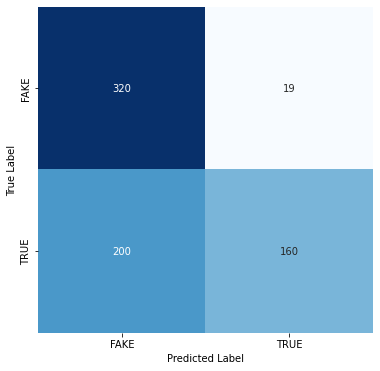

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
result = model.predict(X_test) 
print("precisão: ", accuracy_score(y_test, result)) 
print (classification_report(y_test, result))

precisão:  0.6866952789699571
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       339
           1       0.89      0.44      0.59       360

    accuracy                           0.69       699
   macro avg       0.75      0.69      0.67       699
weighted avg       0.76      0.69      0.67       699



In [ ]:
# Example
testSentence = "@DrJohnB2 Meu Deus... mais um elemento além das substâncias das w4cin4s. Óleo de silicone nas seringas. @SF_Moro @mariosabinof @DanielaLima_ @renataagostini @fabiarichter @GiselaSavioli @biodireito @consumidor_gov @JusticaGovBR PROCON? @JanainaDoBrasil @deltanmd @alexandregarcia"

testSentence = clean(testSentence)
vectorizedSentence = vectorizer.transform([testSentence]).toarray()
result = model.predict(vectorizedSentence)

print(result[0])

0


In [ ]:
def predictTweet(tweet):

  cleanTweetText = clean(tweet)
  vectorizedSentence = vectorizer.transform([cleanTweetText]).toarray()
  prediction = model.predict(vectorizedSentence)
  
  if prediction[0] == 0:
    label = 'Fake'
    labelPredict = model.predict_proba(vectorizedSentence)[:,1][0]
  else:
    label = 'True'
    labelPredict = model.predict_proba(vectorizedSentence)[:,0][0]

  return label, labelPredict

In [ ]:
tweets_df = pd.read_csv('tweets.csv')

In [ ]:
classification_array = []
confidence_array = []

for index, row in tweets_df.iterrows():
    classification, confidence = predictTweet(row['tweet'])
    classification_array.append(classification)
    confidence_array.append(confidence)

print(len(classification_array))
print(len(confidence_array))

1674
1674


In [ ]:
dfPredictions = pd.DataFrame({'tweet': tweets_df['tweet'], 'classification': classification_array, 'confidence':  confidence_array})

In [ ]:
 #before
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
dfPredictions

In [ ]:
#after
dfPredictionsOrd = dfPredictions.sort_values('classification', inplace=False)
dfPredictionsOrdOld = dfPredictionsOrd
dfPredictionsOrd = dfPredictionsOrd.drop('confidence', axis=1)
dfPredictionsOrd

In [ ]:
no_of_fakes = dfPredictions.loc[dfPredictions['classification'] == 'Fake'].count()[0]
no_of_trues = dfPredictions.loc[dfPredictions['classification'] == 'True'].count()[0]

print("number of fakes in test: ", no_of_fakes)
print("number of trues in test: ", no_of_trues)

number of fakes in test:  1561
number of trues in test:  113
